# Homework 03: Words and Tokenization

## Submission Instructions:
1. Once the notebook is completed, **RESTART THE KERNEL AND RUN ALL CELLS**, save it and submit it. 
2. DO NOT submit the data from the assignment.
3. Whenever we ask to .head(10) the results or print out a value, please use `print()` so for example `print(df.head(10))`. Print only the answers to the questions that have been asked.  Do not print the head of a dataset unless explicitly asked. 
4. Whenever displaying a graph use `plt.show()`
5. For theoretical answers/short answers, use print() (e.g., print("your answer")).
6. Wherever we have code displayed to print out values, use that code as a template to print out your output.  For example, if we give you `print(f'Threshold for best accuracy: {}')` please use code in this style to print out your output.

In [59]:
import pandas as pd
import numpy as np
import time
import dill
import nltk
import json
from pathlib import Path
import re
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Ensure nltk stopwords and wordnet are downloaded if not already:
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('punkt_tab')

from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from nltk.stem import PorterStemmer
from tokenizers import Tokenizer, models, trainers
from tokenizers.normalizers import NFD, Lowercase, StripAccents, Sequence
from tokenizers.pre_tokenizers import Whitespace




### Question 1

Load your JSON data (from Homework 02). Extract the `description` field from the first job and extract the text (using BeautifulSoup)

In [60]:
with open("data.json", 'r') as file:
        df = json.load(file)

df1=df[0]["job_description"]
Jobdescr1 = BeautifulSoup(df1, 'html.parser').get_text(separator=' ')

In [61]:
Jobdescr1

"Work Location: Mount Laurel, New Jersey, United States of America Hours: 40 Pay Details: $68,640 - $112,320 USD TD is committed to providing fair and equitable compensation opportunities to all colleagues. Growth opportunities and skill development are defining features of the colleague experience at TD. Our compensation policies and practices have been designed to allow colleagues to progress through the salary range over time as they progress in their role. The base pay actually offered may vary based upon the candidate's skills and experience, job-related knowledge, geographic location, and other specific business and organizational needs. As a candidate, you are encouraged to ask compensation related questions and have an open dialogue with your recruiter who can provide you more specific details for this role. Line of Business: Enterprise Enabling Functions Job Description: The Sr Business Analyst plans, manages, leads and oversees the end-to-end delivery of requirements througho

### Question 2

Tokenize the `description` into words using `nltk.word_tokenize`. Print the first 10 tokens.

In [62]:

tokens = word_tokenize(Jobdescr1)
print(tokens[:10])


['Work', 'Location', ':', 'Mount', 'Laurel', ',', 'New', 'Jersey', ',', 'United']


### Question 3

Count how many tokens are in the job description.

In [63]:

num_tokens = len(tokens)
print("Number of tokens in the job description:", num_tokens)


Number of tokens in the job description: 2129


### Question 4

How many unique words appear in the description?

In [64]:

unique_tokens = set(tokens)
num_unique = len(unique_tokens)

print("Number of unique words in the job description:", num_unique)


Number of unique words in the job description: 775


### Question 5

Remove punctuation from the tokens using a regex and show the cleaned tokens.

In [65]:
cleaned_tokens = []
for token in tokens:
    cleaned_token = re.sub(r'[^a-zA-Z0-9]', "", token)  
    if cleaned_token != "":  
        cleaned_tokens.append(cleaned_token)

cleaned_tokens[:20]

['Work',
 'Location',
 'Mount',
 'Laurel',
 'New',
 'Jersey',
 'United',
 'States',
 'of',
 'America',
 'Hours',
 '40',
 'Pay',
 'Details',
 '68640',
 '112320',
 'USD',
 'TD',
 'is',
 'committed']

### Question 6

Remove English stopwords from the cleaned tokens. Show the top 15 remaining words by frequency.

In [66]:

stop_words = set(stopwords.words('english'))

filtered_tokens = [t for t in cleaned_tokens if t.lower() not in stop_words]

freq_dist = Counter(filtered_tokens)

top15 = freq_dist.most_common(15)
top15


[('business', 36),
 ('project', 33),
 ('requirements', 24),
 ('stakeholders', 14),
 ('work', 14),
 ('development', 11),
 ('experience', 11),
 ('support', 10),
 ('Never', 10),
 ('Occasional', 10),
 ('TD', 9),
 ('Continuous', 9),
 ('colleagues', 8),
 ('delivery', 8),
 ('including', 8)]

### Question 7

Apply the Porter stemmer to the tokens and show the results for the first 20 tokens.

In [67]:

stemmer = PorterStemmer()

stems = [stemmer.stem(t) for t in cleaned_tokens]

stems[:20]


['work',
 'locat',
 'mount',
 'laurel',
 'new',
 'jersey',
 'unit',
 'state',
 'of',
 'america',
 'hour',
 '40',
 'pay',
 'detail',
 '68640',
 '112320',
 'usd',
 'td',
 'is',
 'commit']

### Question 8

Apply WordNet lemmatization to the tokens and show the results for the first 20 tokens.

In [68]:

lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

lemmatized_tokens[:20]



['Work',
 'Location',
 'Mount',
 'Laurel',
 'New',
 'Jersey',
 'United',
 'States',
 'America',
 'Hours',
 '40',
 'Pay',
 'Details',
 '68640',
 '112320',
 'USD',
 'TD',
 'committed',
 'providing',
 'fair']

### Question 9

Compare the results of stemming vs. lemmatization for the same set of tokens. What differences do you observe?

In [69]:
print("Stemming produced many truncated forms that are not proper English words, "
      "such as 'locat' for 'Location' and 'unit' for 'United'. "
      "In contrast, lemmatization preserved valid dictionary forms, "
      "giving 'Location' and 'United'.")


Stemming produced many truncated forms that are not proper English words, such as 'locat' for 'Location' and 'unit' for 'United'. In contrast, lemmatization preserved valid dictionary forms, giving 'Location' and 'United'.


### Question 10

We showed the relationship in class between the number of words in each document and the size of the vocabulary for each document.  A better way of illustrating Herdan's Law (as I believe Pragyan asked) is to:
1. Combine all your texts into 1 document
2. Extract all the words
3. For each word add it to the vocab (unique words) 1 at a time and keep track of the cumulative size of the vocab as you add each word

Implement this below.  Only keep track of the vocab size for every 100th word (to avoid overcrowding your graph in the next question).


In [70]:

all_cleaned_tokens = []
for job in df:
    description = job.get('job_description', '')
    parsed = BeautifulSoup(description, 'html.parser').get_text(separator=' ', strip=True)
    all_tokens = word_tokenize(parsed)

    for one_token in all_tokens:
        cleaned = re.sub(r'[^A-Za-z0-9]', '', one_token).lower() 
        if cleaned: 
            all_cleaned_tokens.append(cleaned)

total_words = []
vocab = set()
for i, token in enumerate(all_cleaned_tokens, start=1):  
    vocab.add(token)
    if i % 100 == 0: 
        total_words.append({"cumulative_words": i, "vocab_size": len(vocab)})


total_words[:10]


[{'cumulative_words': 100, 'vocab_size': 77},
 {'cumulative_words': 200, 'vocab_size': 137},
 {'cumulative_words': 300, 'vocab_size': 178},
 {'cumulative_words': 400, 'vocab_size': 230},
 {'cumulative_words': 500, 'vocab_size': 264},
 {'cumulative_words': 600, 'vocab_size': 294},
 {'cumulative_words': 700, 'vocab_size': 326},
 {'cumulative_words': 800, 'vocab_size': 355},
 {'cumulative_words': 900, 'vocab_size': 383},
 {'cumulative_words': 1000, 'vocab_size': 414}]

### Question 11

Graph the vocabulary size against the number of words

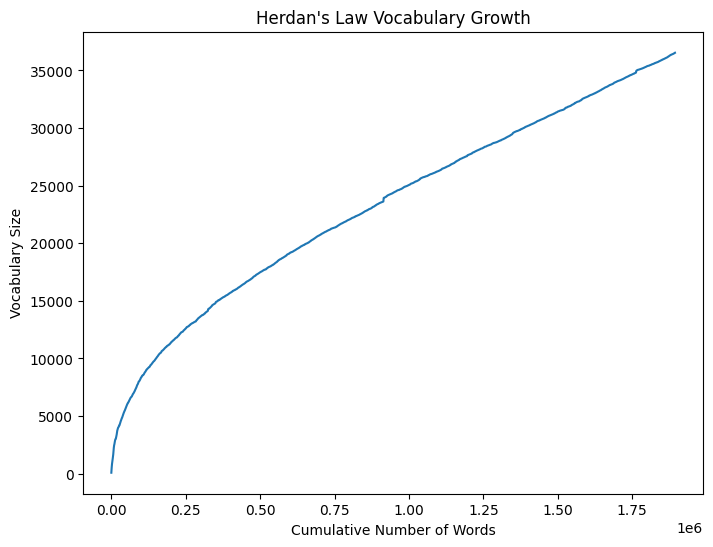

In [71]:

word_counts = [point["cumulative_words"] for point in total_words]
vocab_sizes = [point["vocab_size"] for point in total_words]

plt.figure(figsize=(8,6))
plt.plot(word_counts, vocab_sizes)

plt.title("Herdan's Law Vocabulary Growth")
plt.xlabel("Cumulative Number of Words")
plt.ylabel("Vocabulary Size")
plt.show()


### Question 12

What can you say about the relationship between the growth in the vocabulary size and the number of words?

In [72]:
print('vocabulary size increases with the number of words, but not clearly defined linear')

vocabulary size increases with the number of words, but not clearly defined linear


### Question 13

Train a BPE tokenizer from scratch on your job descriptions
    - Use a vocab size of 30,000

In [73]:
def corpus_iter():
    for job in df:  
        html = job.get("job_description", "")
        text = BeautifulSoup(html, "html.parser").get_text(separator=" ", strip=True)
        if text:
            yield text

In [74]:
from tokenizers import pre_tokenizers

In [75]:
tokenizer = Tokenizer(BPE(unk_token="[UNK]")) 
tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel(add_prefix_space=False) 

In [76]:
trainer = BpeTrainer(
    vocab_size=30000,
    show_progress=True
)

tokenizer.train_from_iterator(corpus_iter(), trainer=trainer, length=None)


### Question 14

- Print out the tokens for your first job description

In [77]:
encoded_output = tokenizer.encode(Jobdescr1)
encoded_output.tokens

['Work',
 'ĠLocation',
 ':',
 'ĠMount',
 'ĠLa',
 'urel',
 ',',
 'ĠNew',
 'ĠJersey',
 ',',
 'ĠUnited',
 'ĠStates',
 'Ġof',
 'ĠAmerica',
 'ĠHours',
 ':',
 'Ġ40',
 'ĠPay',
 'ĠDetails',
 ':',
 'Ġ$',
 '68',
 ',',
 '640',
 'Ġ-',
 'Ġ$',
 '112',
 ',',
 '320',
 'ĠUSD',
 'ĠTD',
 'Ġis',
 'Ġcommitted',
 'Ġto',
 'Ġproviding',
 'Ġfair',
 'Ġand',
 'Ġequitable',
 'Ġcompensation',
 'Ġopportunities',
 'Ġto',
 'Ġall',
 'Ġcolleagues',
 '.',
 'ĠGrowth',
 'Ġopportunities',
 'Ġand',
 'Ġskill',
 'Ġdevelopment',
 'Ġare',
 'Ġdefining',
 'Ġfeatures',
 'Ġof',
 'Ġthe',
 'Ġcolleague',
 'Ġexperience',
 'Ġat',
 'ĠTD',
 '.',
 'ĠOur',
 'Ġcompensation',
 'Ġpolicies',
 'Ġand',
 'Ġpractices',
 'Ġhave',
 'Ġbeen',
 'Ġdesigned',
 'Ġto',
 'Ġallow',
 'Ġcolleagues',
 'Ġto',
 'Ġprogress',
 'Ġthrough',
 'Ġthe',
 'Ġsalary',
 'Ġrange',
 'Ġover',
 'Ġtime',
 'Ġas',
 'Ġthey',
 'Ġprogress',
 'Ġin',
 'Ġtheir',
 'Ġrole',
 '.',
 'ĠThe',
 'Ġbase',
 'Ġpay',
 'Ġactually',
 'Ġoffered',
 'Ġmay',
 'Ġvary',
 'Ġbased',
 'Ġupon',
 'Ġthe',
 'Ġcandi

### Question 15

- Do the same as you did above, but this time:
    - Tokenize your combined document and keep track of the cumulative vocabulary growth

In [78]:

def corpus_iter_plain(df):
    for job in df:
        html = job.get("job_description", "")
        yield BeautifulSoup(html, "html.parser").get_text(separator=" ", strip=True)

seen = set()              
cumulative_tokens = 0      
word_counts = []           
vocab_sizes = []           

for text in corpus_iter_plain(df):
    enc = tokenizer.encode(text)     
    for tok in enc.tokens:
        cumulative_tokens += 1
        seen.add(tok)
        if cumulative_tokens % 100 == 0:
            word_counts.append(cumulative_tokens)
            vocab_sizes.append(len(seen))


### Question 16

- Graph the vocabulary (against the word index) for both the Regex tokenization and the BPE tokenization

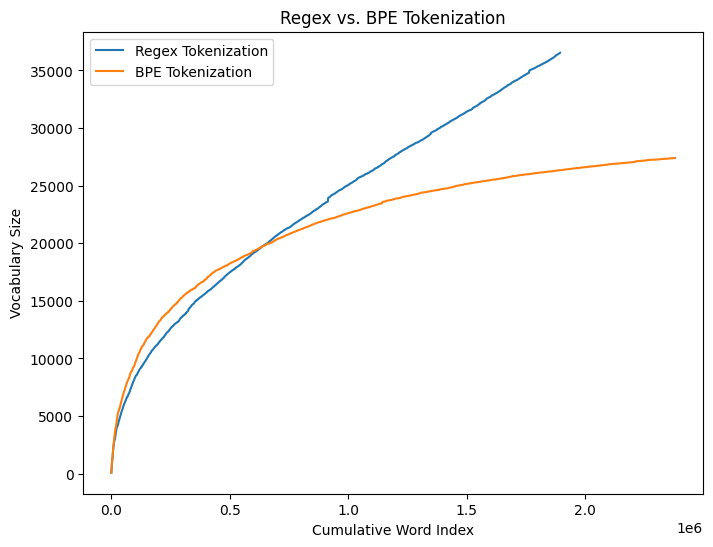

In [79]:



bpe_x = word_counts
bpe_y = vocab_sizes


plt.figure(figsize=(8,6))
plt.plot(regex_x, regex_y, label="Regex Tokenization")
plt.plot(bpe_x, bpe_y, label="BPE Tokenization")

plt.title("Regex vs. BPE Tokenization")
plt.xlabel("Cumulative Word Index")
plt.ylabel("Vocabulary Size")
plt.legend()
plt.show()


### Question 17

- Which vocabulary grows faster?  Does either seem to grow unrestrained?  Does the vocab of your BPE tokenizer approach the maximum vocab size you trained it on?

In [80]:
print('Regex grows faster and looks unbounded\n BPE growth is restrained, stabilizes much earlier, and does not reach the target vocab size 30k')

Regex grows faster and looks unbounded
 BPE growth is restrained, stabilizes much earlier, and does not reach the target vocab size 30k
